
# Data Analysis of Ireland climate indicies

# 1. Understanding the Data

In [1]:
 pip install pymannkendall


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymannkendall as mk
#from google.colab import files
import io
from scipy import stats
from scipy.stats import kendalltau
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
# Upload file
#uploaded = files.upload()

# Read the uploaded CSV file
#data = pd.read_csv(io.BytesIO(uploaded['all_yearly.csv']))
#print(data.head())
data = pd.read_csv('all_yearly.csv')



In [4]:
data.columns

Index(['station_id', 'year', 'n_rain', 'R5mm', 'R10mm', 'R20mm', 'SDII',
       'PRCPTOT', 'CDD', 'CWD', 'Rx1day', 'Rx5day', 'R95pTOT', 'R99pTOT',
       'n_maxdy', 'n_mindy', 'FD', 'TR', 'SU', 'ID', 'TNn', 'TNx', 'TXn',
       'TXx', 'DTR', 'TN10p', 'TN90p', 'TX10p', 'TX90p', 'WSDI', 'CSDI',
       'GSL'],
      dtype='object')

In [5]:
data.station_id

0                    ATHENRY
1                    ATHENRY
2                    ATHENRY
3                    ATHENRY
4                    ATHENRY
                ...         
1736    VALENTIA OBSERVATORY
1737    VALENTIA OBSERVATORY
1738    VALENTIA OBSERVATORY
1739    VALENTIA OBSERVATORY
1740    VALENTIA OBSERVATORY
Name: station_id, Length: 1741, dtype: object

In [6]:
data.shape

(1741, 32)

In [7]:
data.describe()

,year,n_rain,R5mm,R10mm,R20mm,SDII,PRCPTOT,CDD,CWD,Rx1day,...,TXn,TXx,DTR,TN10p,TN90p,TX10p,TX90p,WSDI,CSDI,GSL
count,1741.000000,1741.000000,1596.000000,1596.000000,1596.000000,1589.000000,1596.000000,1596.000000,1596.000000,1494.000000,...,1425.000000,1425.000000,1408.000000,1256.000000,1256.000000,1263.000000,1263.000000,1262.000000,1256.000000,1404.000000
mean,1987.062608,346.419299,69.538847,28.708647,5.833333,6.285241,1003.180263,36.897180,70.451817,204.649331,...,1.871450,25.140414,6.573975,8.910775,13.368966,8.095706,13.056834,6.864501,1.750796,335.027066
std,22.085729,73.806215,19.794946,11.110150,3.878376,0.900933,271.306129,12.997544,20.841227,91.392591,...,2.161133,2.323450,1.084497,4.077960,5.065924,4.447421,5.202193,8.312294,4.365475,25.522494
min,1941.000000,0.000000,0.000000,0.000000,0.000000,4.428000,0.000000,0.000000,0.000000,0.000000,...,-9.390000,18.610000,4.057000,1.096000,2.551000,0.546000,2.167000,0.000000,0.000000,244.000000
25%,1969.000000,365.000000,55.750000,20.750000,3.000000,5.609000,809.775000,28.275000,56.600000,139.700000,...,0.600000,23.440000,5.673750,5.753000,9.903750,4.645000,9.290000,0.000000,0.000000,323.000000
50%,1988.000000,365.000000,67.000000,27.000000,5.000000,6.116000,966.650000,34.200000,66.050000,190.800000,...,2.100000,24.900000,6.802500,8.493000,12.754000,7.388000,12.363000,6.000000,0.000000,342.000000
75%,2006.000000,365.000000,81.000000,34.000000,8.000000,6.838000,1150.425000,42.200000,81.225000,255.800000,...,3.300000,26.500000,7.443250,11.242500,16.712000,10.685000,16.438000,12.000000,0.000000,355.000000
max,2023.000000,366.000000,145.000000,73.000000,28.000000,9.650000,2151.900000,131.600000,195.600000,773.000000,...,7.205000,33.050000,9.159000,33.699000,35.342000,26.160000,33.973000,43.000000,40.000000,360.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741 entries, 0 to 1740
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   station_id  1741 non-null   object 
 1   year        1741 non-null   int64  
 2   n_rain      1741 non-null   int64  
 3   R5mm        1596 non-null   float64
 4   R10mm       1596 non-null   float64
 5   R20mm       1596 non-null   float64
 6   SDII        1589 non-null   float64
 7   PRCPTOT     1596 non-null   float64
 8   CDD         1596 non-null   float64
 9   CWD         1596 non-null   float64
 10  Rx1day      1494 non-null   float64
 11  Rx5day      1494 non-null   float64
 12  R95pTOT     1589 non-null   float64
 13  R99pTOT     1589 non-null   float64
 14  n_maxdy     1544 non-null   float64
 15  n_mindy     1544 non-null   float64
 16  FD          1420 non-null   float64
 17  TR          1420 non-null   float64
 18  SU          1425 non-null   float64
 19  ID          1425 non-null  

# 2. Data Preparation

In [9]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 station_id      0
year            0
n_rain          0
R5mm          145
R10mm         145
R20mm         145
SDII          152
PRCPTOT       145
CDD           145
CWD           145
Rx1day        247
Rx5day        247
R95pTOT       152
R99pTOT       152
n_maxdy       197
n_mindy       197
FD            321
TR            321
SU            316
ID            316
TNn           321
TNx           321
TXn           316
TXx           316
DTR           333
TN10p         485
TN90p         485
TX10p         478
TX90p         478
WSDI          479
CSDI          485
GSL           337
dtype: int64


In [10]:
columns_to_check = ['year', 'n_rain', 'R5mm', 'R10mm', 'R20mm', 'SDII',
                    'PRCPTOT', 'CDD', 'CWD', 'Rx1day', 'Rx5day', 'R95pTOT', 'R99pTOT',
                    'n_maxdy', 'n_mindy', 'FD', 'TR', 'SU', 'ID', 'TNn', 'TNx', 'TXn',
                    'TXx', 'DTR', 'TN10p', 'TN90p', 'TX10p', 'TX90p', 'WSDI', 'CSDI',
                    'GSL']

outliers_summary = {}

for column in columns_to_check:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outliers_count = outliers[column].count()
    outliers_summary[column] = outliers_count
print(outliers_summary)

{'year': 0, 'n_rain': 644, 'R5mm': 37, 'R10mm': 54, 'R20mm': 41, 'SDII': 17, 'PRCPTOT': 43, 'CDD': 78, 'CWD': 53, 'Rx1day': 28, 'Rx5day': 51, 'R95pTOT': 42, 'R99pTOT': 66, 'n_maxdy': 515, 'n_mindy': 524, 'FD': 10, 'TR': 1, 'SU': 121, 'ID': 242, 'TNn': 26, 'TNx': 6, 'TXn': 24, 'TXx': 12, 'DTR': 0, 'TN10p': 14, 'TN90p': 10, 'TX10p': 28, 'TX90p': 10, 'WSDI': 24, 'CSDI': 238, 'GSL': 46}


# 3. Exploratory Data Analysis (EDA)

## Univariate plots

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


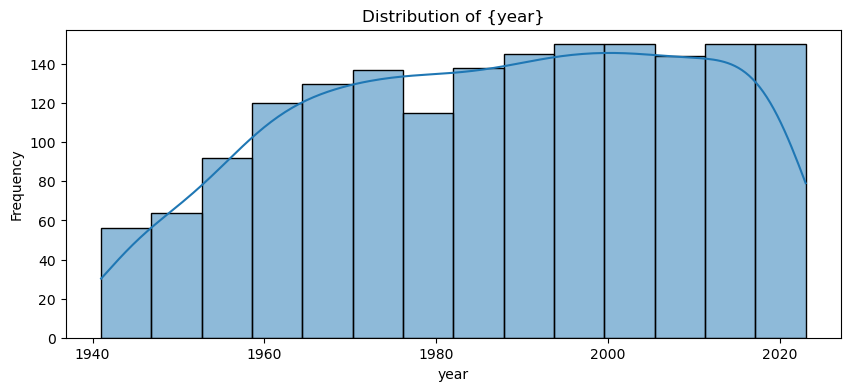

In [11]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['year'].dropna(), kde=True)
    plt.title('Distribution of {year}')
    plt.xlabel('year')
    plt.ylabel('Frequency')
    plt.show()

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


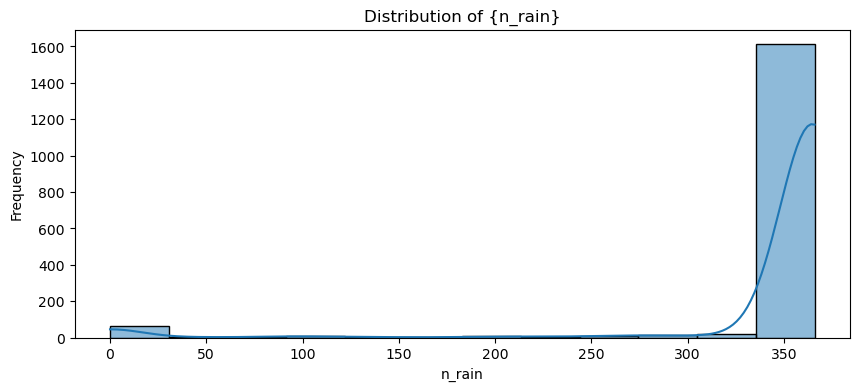

In [12]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['n_rain'].dropna(), kde=True)
    plt.title('Distribution of {n_rain}')
    plt.xlabel('n_rain')
    plt.ylabel('Frequency')
    plt.show()

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


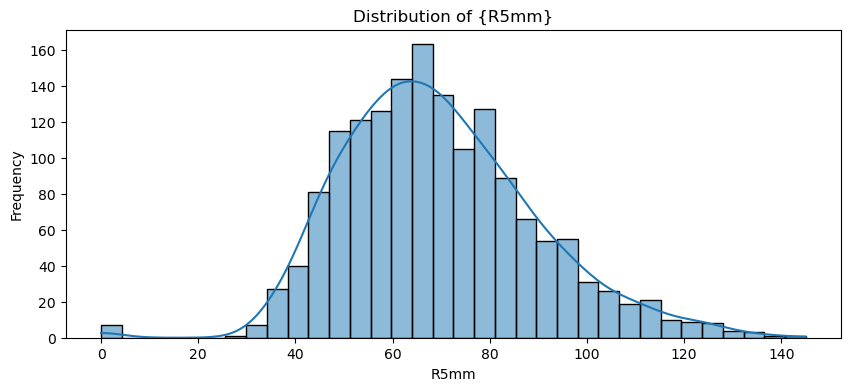

In [13]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['R5mm'].dropna(), kde=True)
    plt.title('Distribution of {R5mm}')
    plt.xlabel('R5mm')
    plt.ylabel('Frequency')
    plt.show()

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


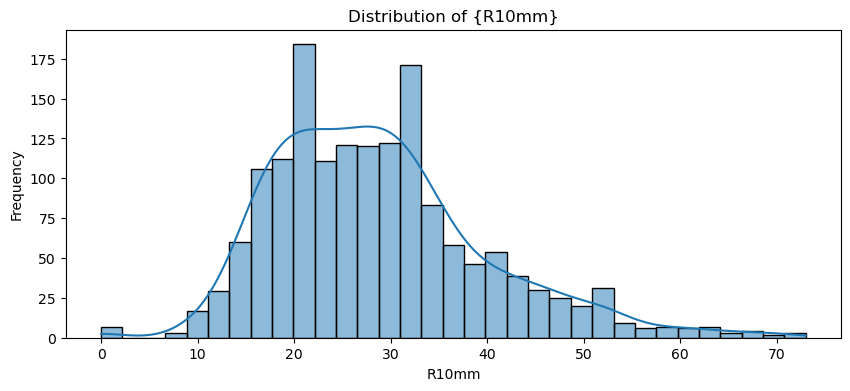

In [14]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['R10mm'].dropna(), kde=True)
    plt.title('Distribution of {R10mm}')
    plt.xlabel('R10mm')
    plt.ylabel('Frequency')
    plt.show()

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


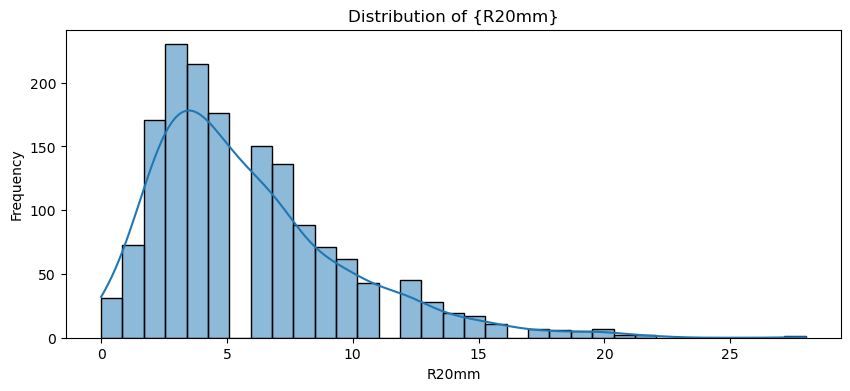

In [15]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['R20mm'].dropna(), kde=True)
    plt.title('Distribution of {R20mm}')
    plt.xlabel('R20mm')
    plt.ylabel('Frequency')
    plt.show()

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


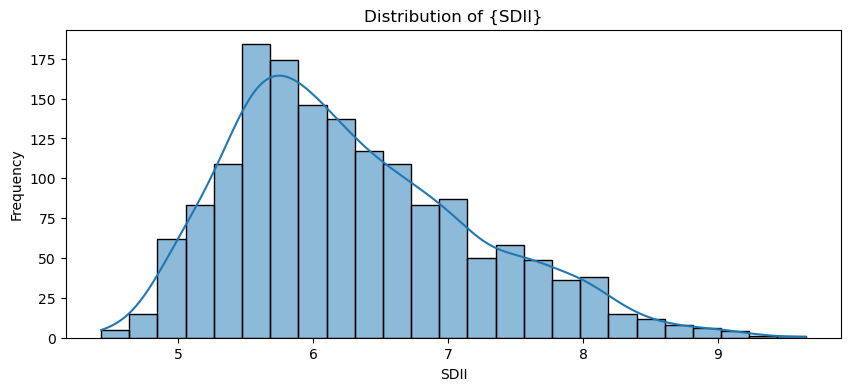

In [16]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['SDII'].dropna(), kde=True)
    plt.title('Distribution of {SDII}')
    plt.xlabel('SDII')
    plt.ylabel('Frequency')
    plt.show()

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


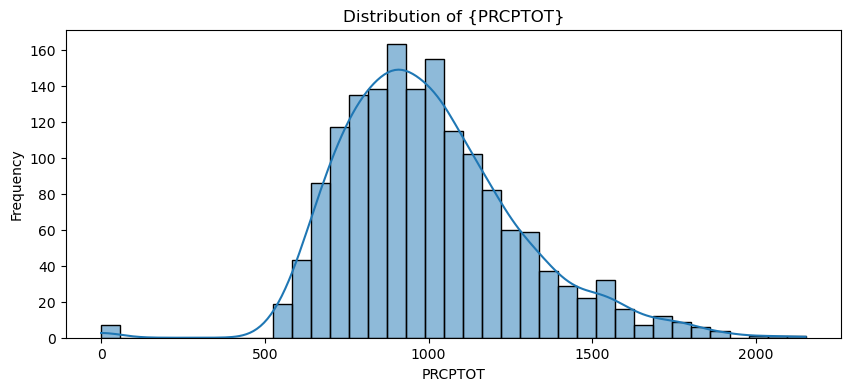

In [17]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['PRCPTOT'].dropna(), kde=True)
    plt.title('Distribution of {PRCPTOT}')
    plt.xlabel('PRCPTOT')
    plt.ylabel('Frequency')
    plt.show()

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


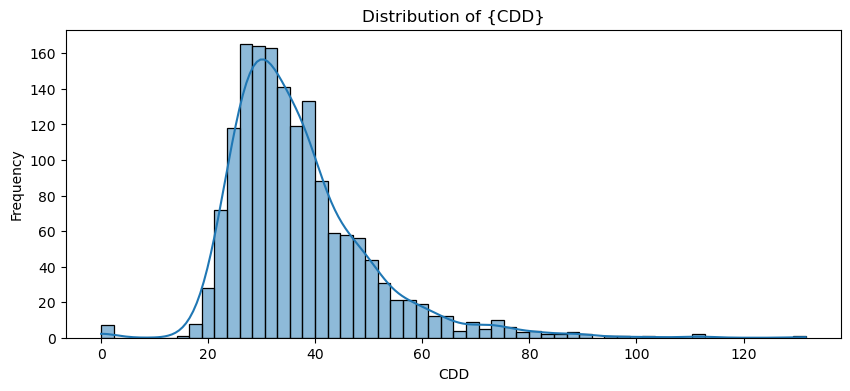

In [18]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['CDD'].dropna(), kde=True)
    plt.title('Distribution of {CDD}')
    plt.xlabel('CDD')
    plt.ylabel('Frequency')
    plt.show()

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


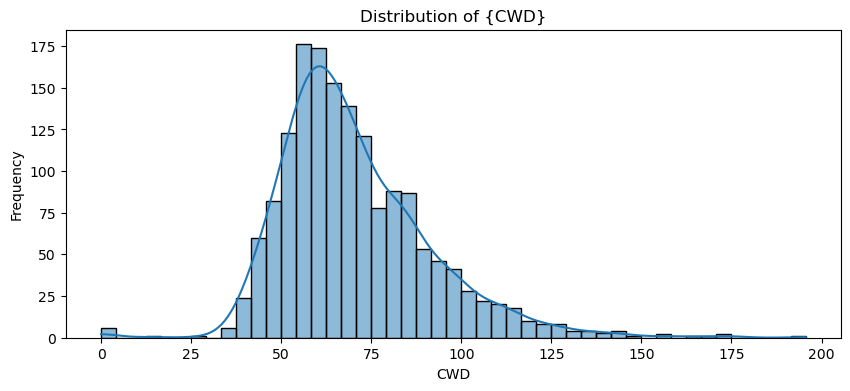

In [19]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['CWD'].dropna(), kde=True)
    plt.title('Distribution of {CWD}')
    plt.xlabel('CWD')
    plt.ylabel('Frequency')
    plt.show()

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


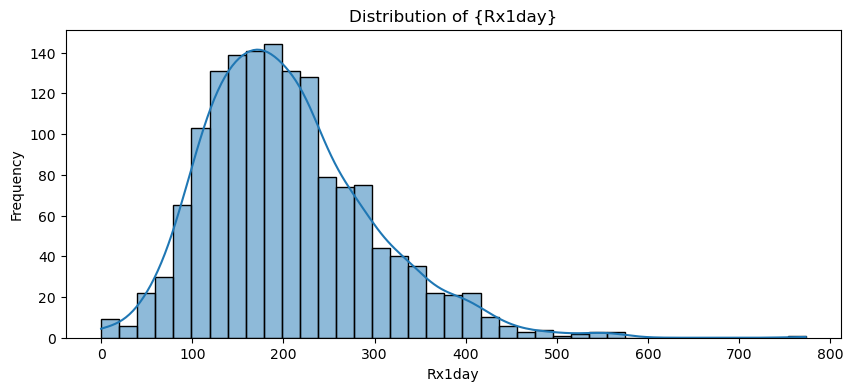

In [20]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['Rx1day'].dropna(), kde=True)
    plt.title('Distribution of {Rx1day}')
    plt.xlabel('Rx1day')
    plt.ylabel('Frequency')
    plt.show()

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


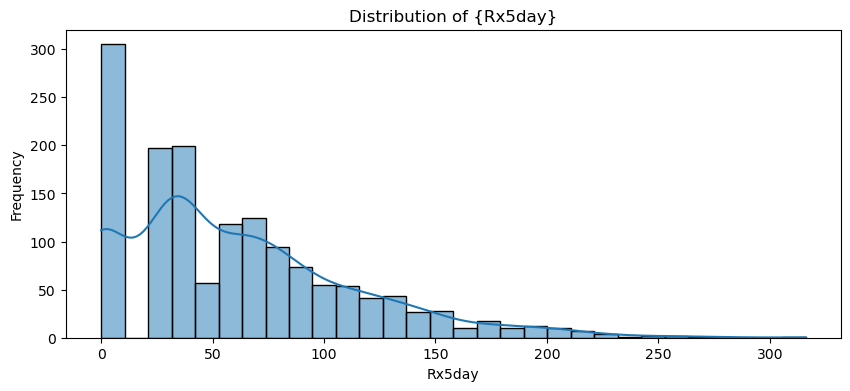

In [21]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['Rx5day'].dropna(), kde=True)
    plt.title('Distribution of {Rx5day}')
    plt.xlabel('Rx5day')
    plt.ylabel('Frequency')
    plt.show()

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


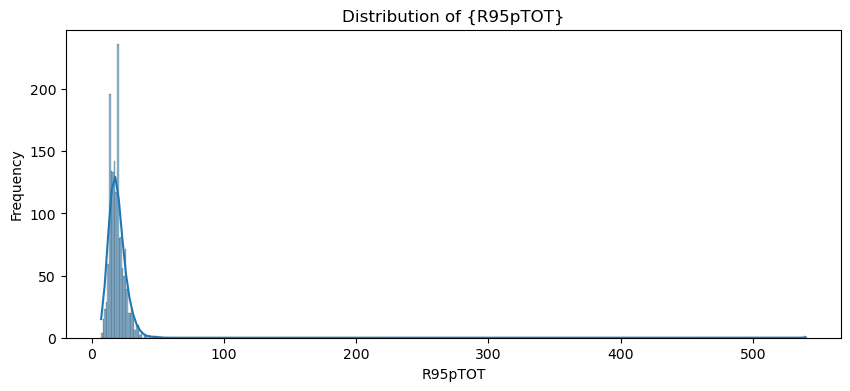

In [22]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['R95pTOT'].dropna(), kde=True)
    plt.title('Distribution of {R95pTOT}')
    plt.xlabel('R95pTOT')
    plt.ylabel('Frequency')
    plt.show()

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


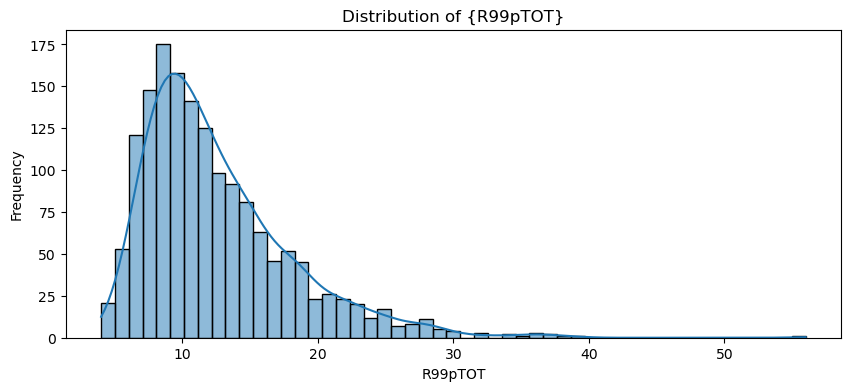

In [23]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['R99pTOT'].dropna(), kde=True)
    plt.title('Distribution of {R99pTOT}')
    plt.xlabel('R99pTOT')
    plt.ylabel('Frequency')
    plt.show()

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


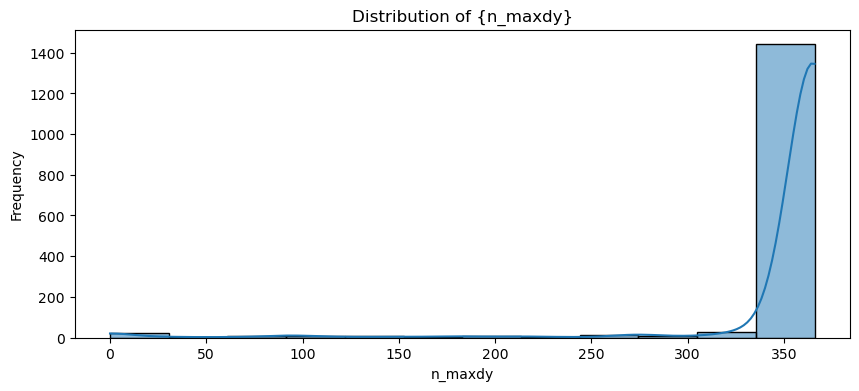

In [24]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['n_maxdy'].dropna(), kde=True)
    plt.title('Distribution of {n_maxdy}')
    plt.xlabel('n_maxdy')
    plt.ylabel('Frequency')
    plt.show()

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


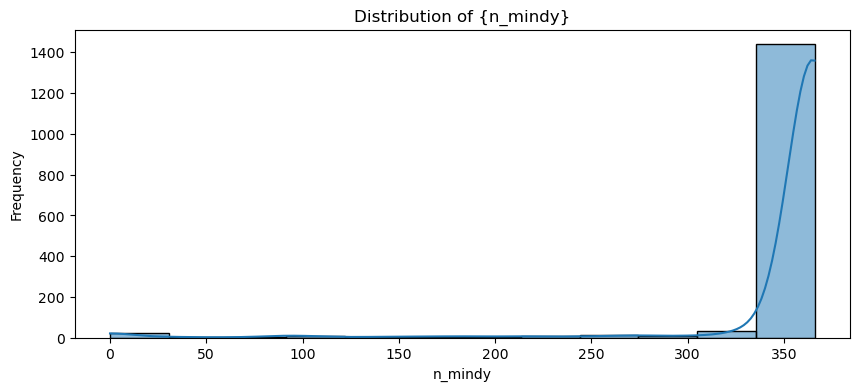

In [25]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['n_mindy'].dropna(), kde=True)
    plt.title('Distribution of {n_mindy}')
    plt.xlabel('n_mindy')
    plt.ylabel('Frequency')
    plt.show()

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


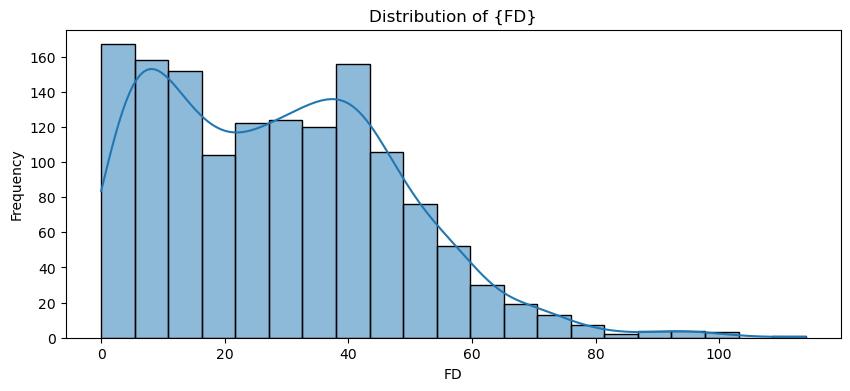

In [26]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['FD'].dropna(), kde=True)
    plt.title('Distribution of {FD}')
    plt.xlabel('FD')
    plt.ylabel('Frequency')
    plt.show()

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


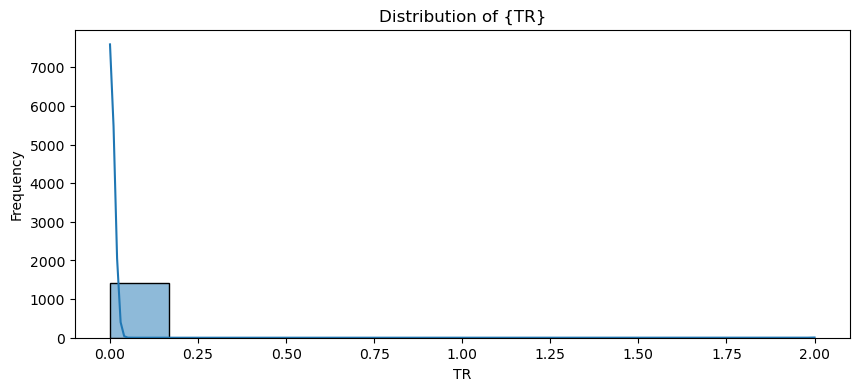

In [27]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['TR'].dropna(), kde=True)
    plt.title('Distribution of {TR}')
    plt.xlabel('TR')
    plt.ylabel('Frequency')
    plt.show()

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


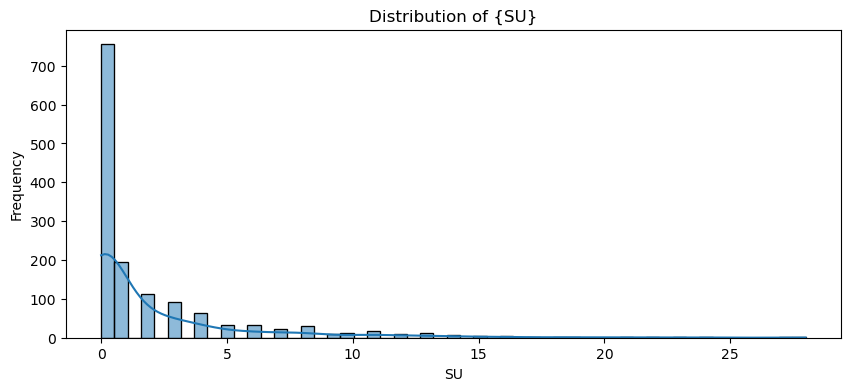

In [28]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['SU'].dropna(), kde=True)
    plt.title('Distribution of {SU}')
    plt.xlabel('SU')
    plt.ylabel('Frequency')
    plt.show()

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


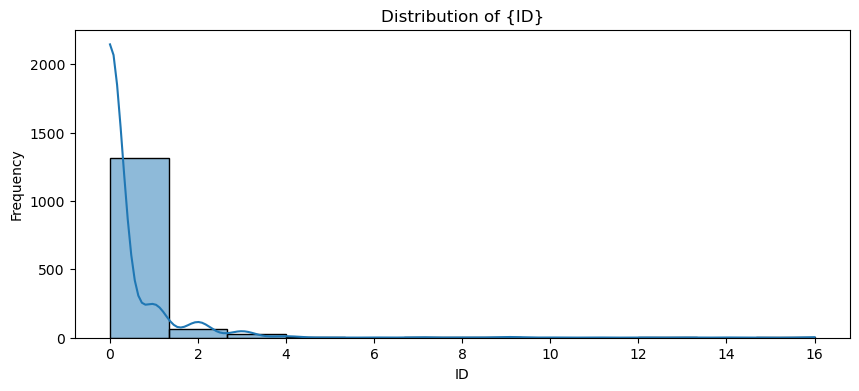

In [29]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['ID'].dropna(), kde=True)
    plt.title('Distribution of {ID}')
    plt.xlabel('ID')
    plt.ylabel('Frequency')
    plt.show()

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


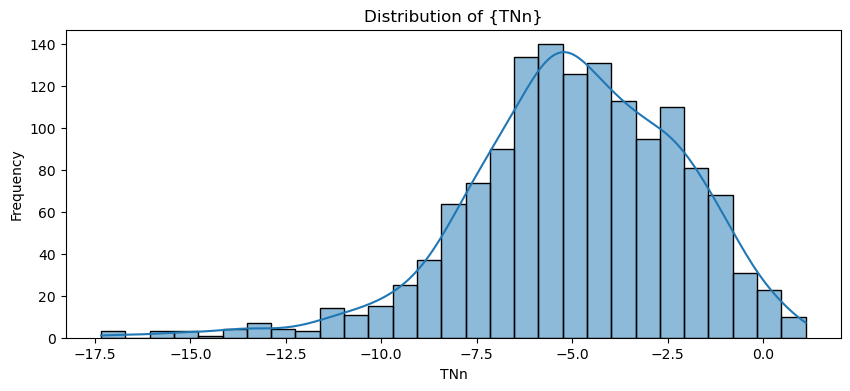

In [30]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['TNn'].dropna(), kde=True)
    plt.title('Distribution of {TNn}')
    plt.xlabel('TNn')
    plt.ylabel('Frequency')
    plt.show()

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


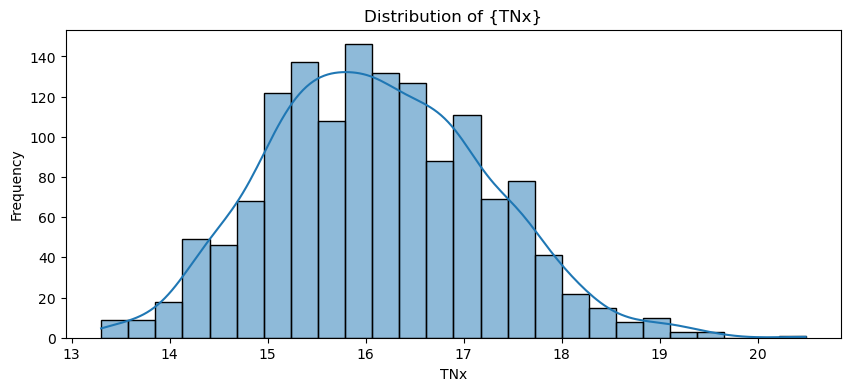

In [31]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['TNx'].dropna(), kde=True)
    plt.title('Distribution of {TNx}')
    plt.xlabel('TNx')
    plt.ylabel('Frequency')
    plt.show()

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


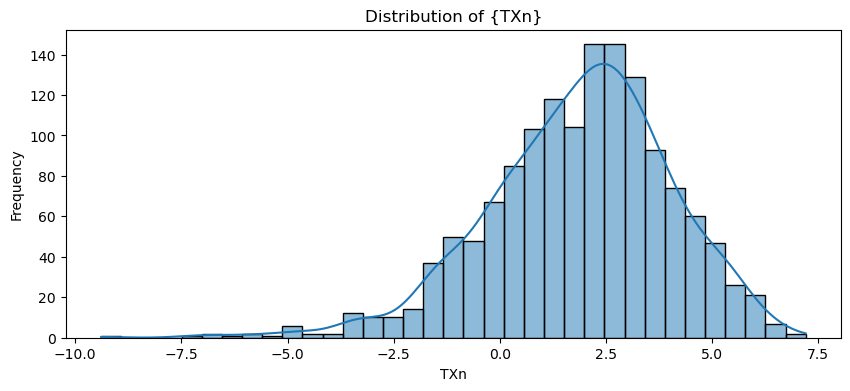

In [32]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['TXn'].dropna(), kde=True)
    plt.title('Distribution of {TXn}')
    plt.xlabel('TXn')
    plt.ylabel('Frequency')
    plt.show()

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


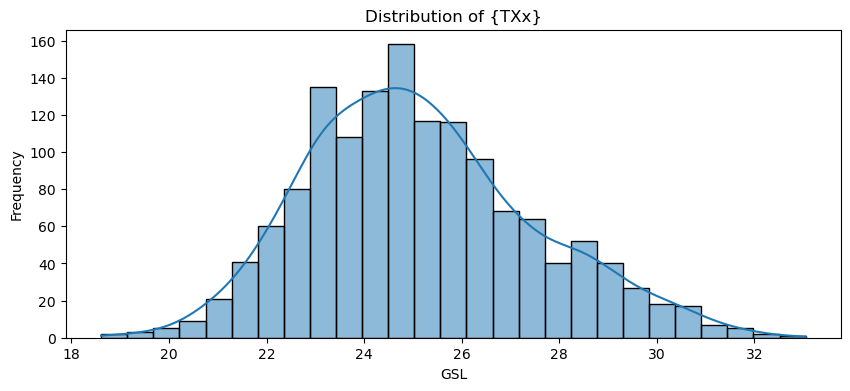

In [33]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['TXx'].dropna(), kde=True)
    plt.title('Distribution of {TXx}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


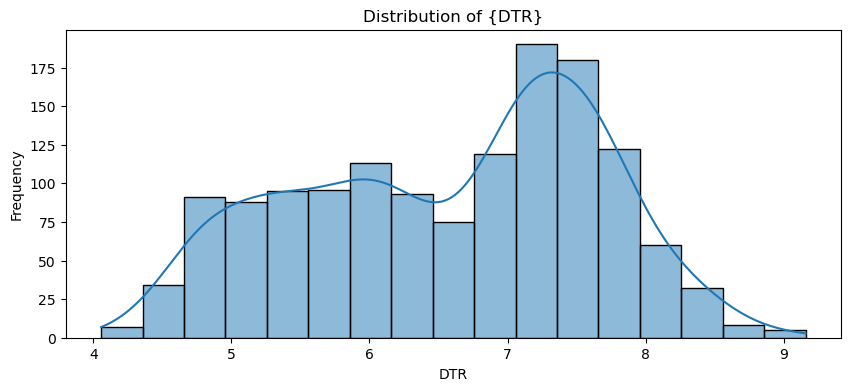

In [34]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['DTR'].dropna(), kde=True)
    plt.title('Distribution of {DTR}')
    plt.xlabel('DTR')
    plt.ylabel('Frequency')
    plt.show()

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


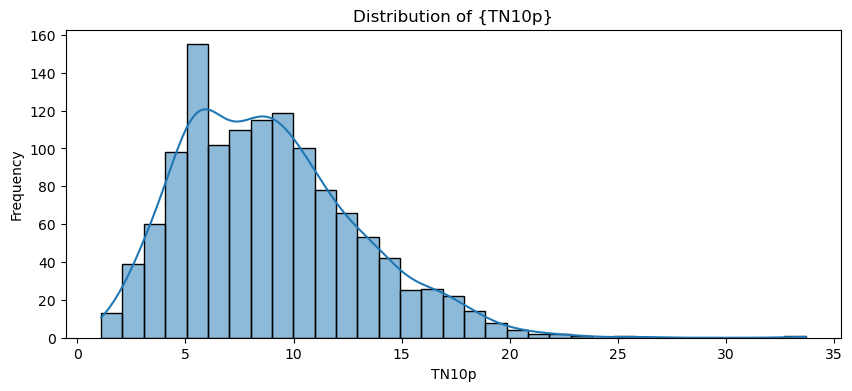

In [35]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['TN10p'].dropna(), kde=True)
    plt.title('Distribution of {TN10p}')
    plt.xlabel('TN10p')
    plt.ylabel('Frequency')
    plt.show()

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


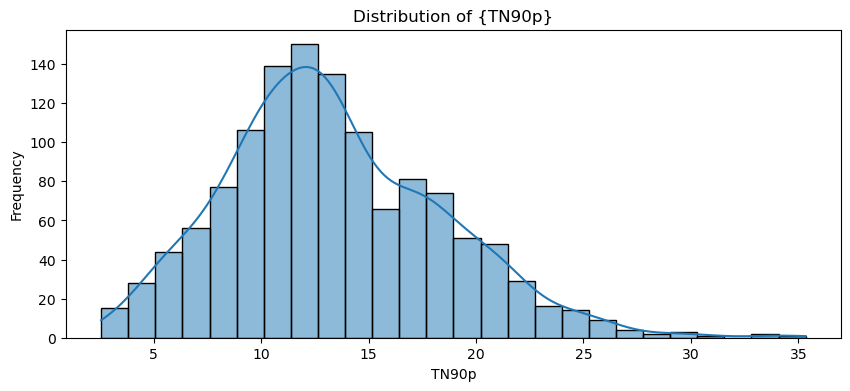

In [36]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['TN90p'].dropna(), kde=True)
    plt.title('Distribution of {TN90p}')
    plt.xlabel('TN90p')
    plt.ylabel('Frequency')
    plt.show()

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


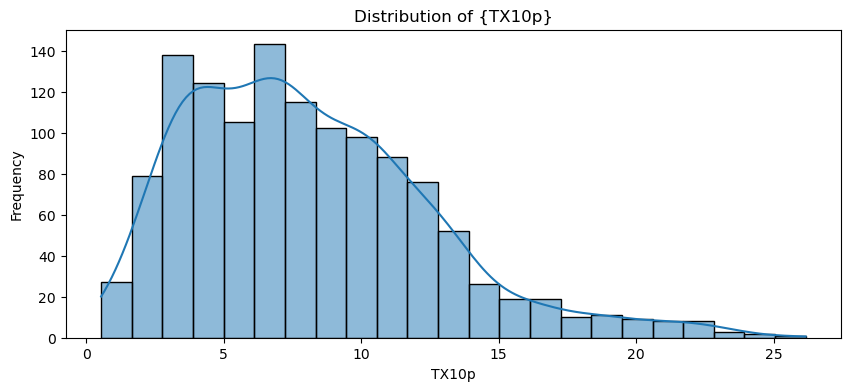

In [37]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['TX10p'].dropna(), kde=True)
    plt.title('Distribution of {TX10p}')
    plt.xlabel('TX10p')
    plt.ylabel('Frequency')
    plt.show()

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


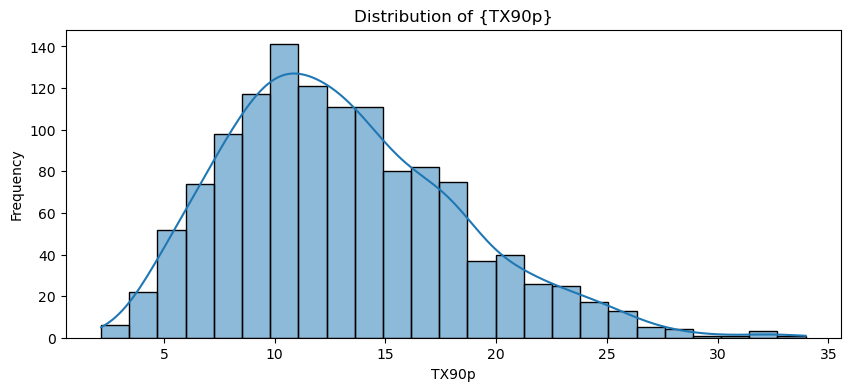

In [38]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['TX90p'].dropna(), kde=True)
    plt.title('Distribution of {TX90p}')
    plt.xlabel('TX90p')
    plt.ylabel('Frequency')
    plt.show()

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


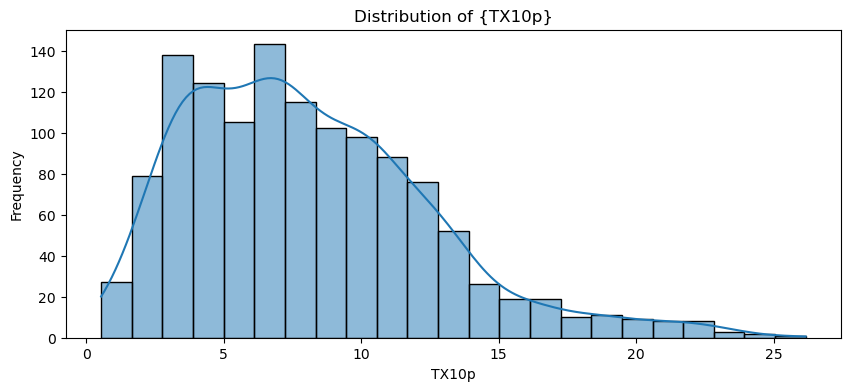

In [39]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['TX10p'].dropna(), kde=True)
    plt.title('Distribution of {TX10p}')
    plt.xlabel('TX10p')
    plt.ylabel('Frequency')
    plt.show()

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


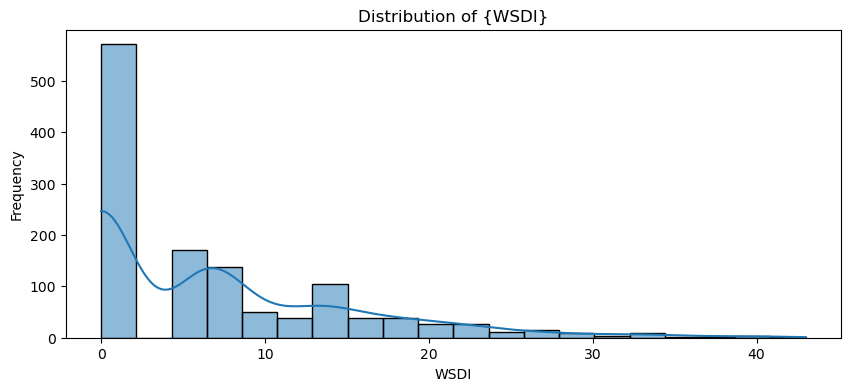

In [40]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['WSDI'].dropna(), kde=True)
    plt.title('Distribution of {WSDI}')
    plt.xlabel('WSDI')
    plt.ylabel('Frequency')
    plt.show()

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


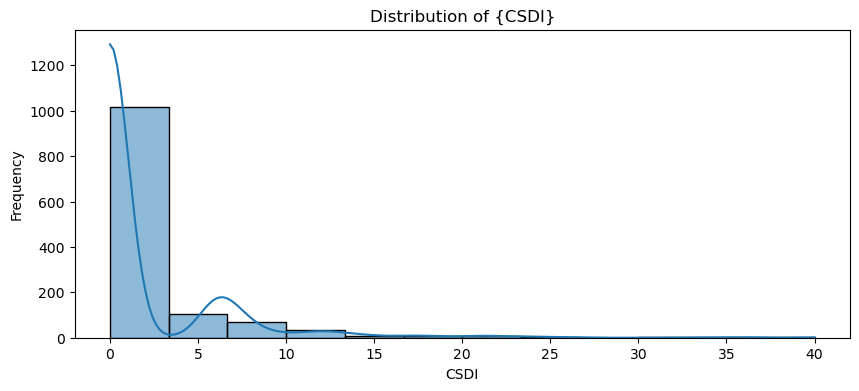

In [41]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['CSDI'].dropna(), kde=True)
    plt.title('Distribution of {CSDI}')
    plt.xlabel('CSDI')
    plt.ylabel('Frequency')
    plt.show()

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


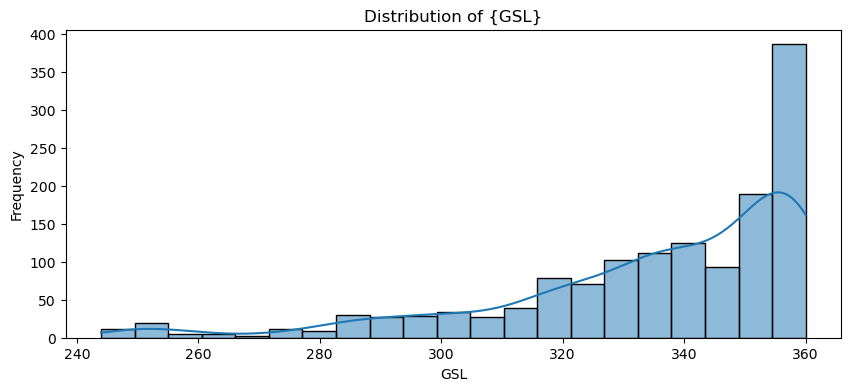

In [42]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['GSL'].dropna(), kde=True)
    plt.title('Distribution of {GSL}')
    plt.xlabel('GSL')
    plt.ylabel('Frequency')
    plt.show()

# Correlation Matrix

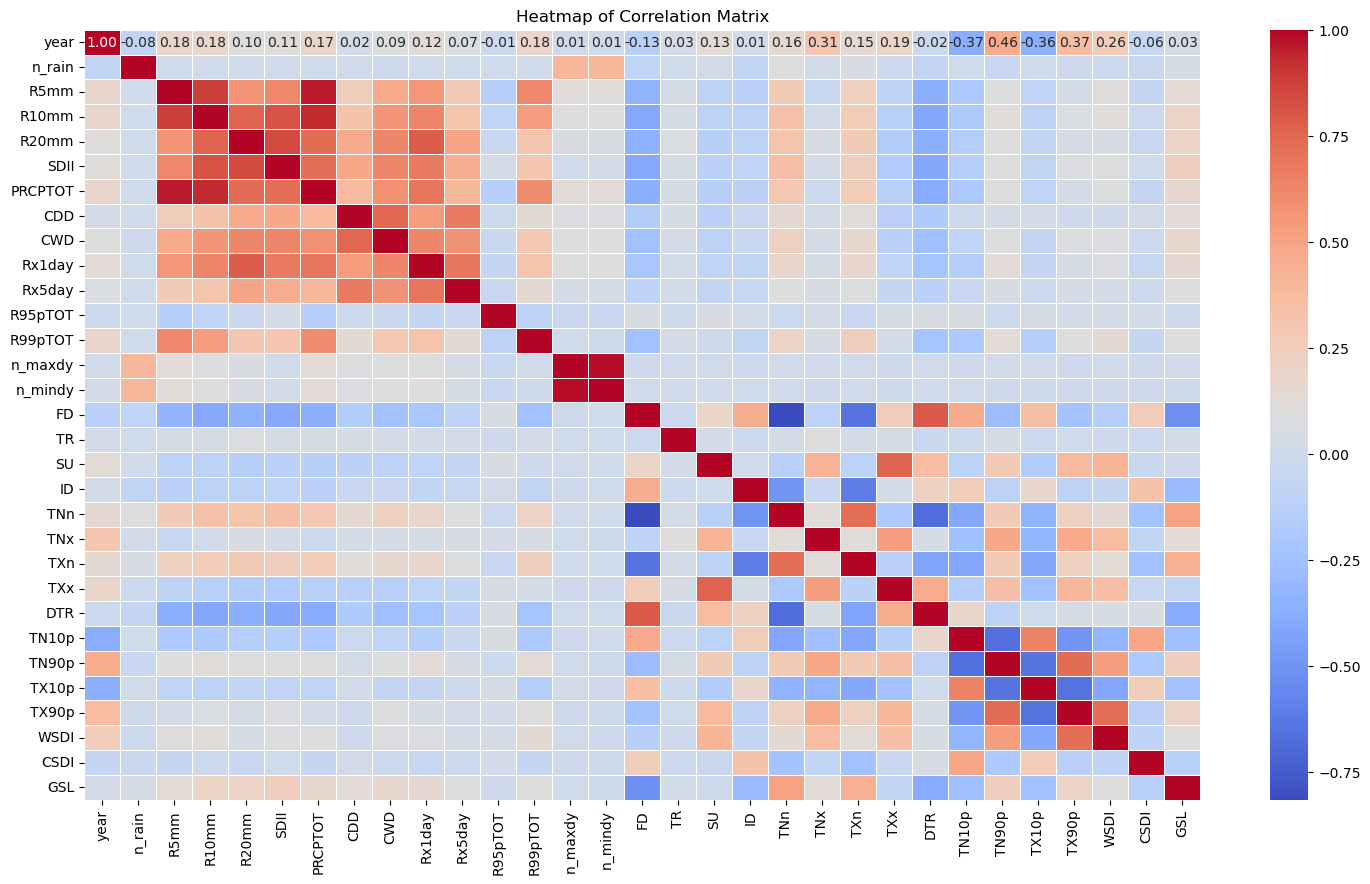

In [43]:
numeric_data = data.select_dtypes(include=[np.number])
numeric_data = numeric_data.fillna(numeric_data.mean())
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

## Treating missing values

considering missing values as NAN

## Treating outliers

Given the nature of climate data, outliers might represent actual extreme events. Instead of removing these, we could consider robust statistical methods or confirm these values are valid observations and not data errors.

# 6. Statistical Analysis

In [48]:
data.sort_values('year', inplace=True)
def perform_mk_test(data, variable):
    data_filtered = data.dropna(subset=[variable])
    result = mk.original_test(data_filtered[variable])
    return result

mk_results_prcptot = perform_mk_test(data, 'PRCPTOT')
mk_results_txx = perform_mk_test(data, 'TXx')

print("Total Precipitation Trends:", mk_results_prcptot)

Total Precipitation Trends: Mann_Kendall_Test(trend='increasing', h=True, p=2.6978419498391304e-13, z=7.308630767500061, Tau=0.1220975636583622, s=155407.0, var_s=452130204.3333333, slope=0.1001898444482888, intercept=886.7485990524897)


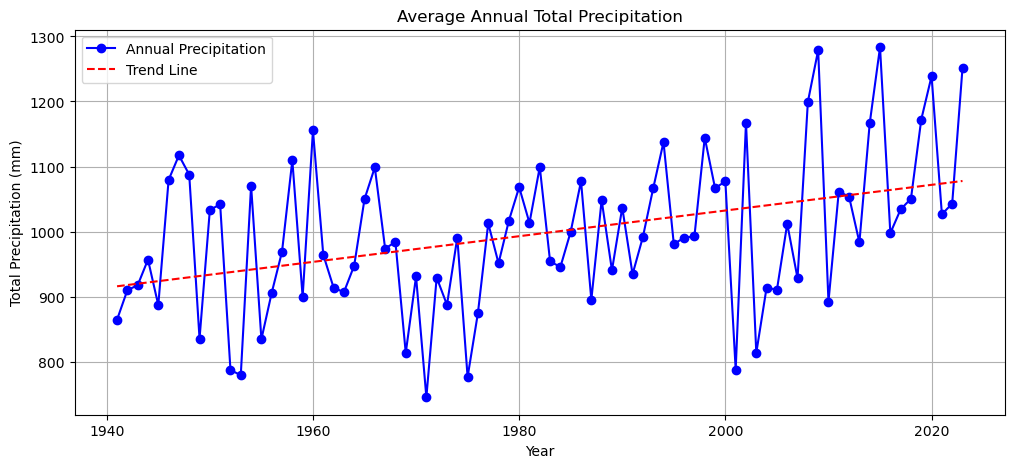

In [49]:
if 'year' in data.columns:
    data['year'] = pd.to_datetime(data['year'].astype(str), format='%Y')
    annual_precip = data.groupby(data['year'].dt.year)['PRCPTOT'].mean()
    plt.figure(figsize=(12, 5))
    plt.plot(annual_precip.index, annual_precip, color='blue', marker='o', linestyle='-', label='Annual Precipitation')

    x = np.arange(len(annual_precip))
    y = annual_precip.values
    slope, intercept = np.polyfit(x, y, 1)
    trend_line = intercept + slope * x
    plt.plot(annual_precip.index, trend_line, 'r--', label='Trend Line')

    plt.title('Average Annual Total Precipitation')
    plt.xlabel('Year')
    plt.ylabel('Total Precipitation (mm)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Column 'year' not found in DataFrame.")

In [50]:
print("Maximum Temperature Trends:", mk_results_txx)

Maximum Temperature Trends: Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=9.041245844034083, Tau=0.1598580721466588, s=162192.0, var_s=321808081.3333333, slope=0.0013429256594724246, intercept=23.94383693045563)


# Seasonal analysis

In [98]:
seasonal = pd.read_csv('all_season.csv')

In [99]:
seasonal

,station_id,year,season,n_rain,R5mm,R10mm,R20mm,SDII,PRCPTOT,Rx1day,...,ID,TNn,TNx,TXn,TXx,DTR,TN10p,TN90p,TX10p,TX90p
0,ATHENRY,2012,Summer,92,30,10,4,7.205,396.3,32.4,...,0.0,5.008,16.39,12.660,25.39,6.720,NaN,NaN,NaN,NaN
1,ATHENRY,2012,Autumn,91,27,13,1,6.691,354.6,22.5,...,0.0,-3.475,14.47,3.543,20.11,7.068,NaN,NaN,NaN,NaN
2,ATHENRY,2013,Winter,90,23,8,3,6.643,325.5,24.6,...,0.0,-4.883,10.06,2.570,13.33,6.467,NaN,NaN,NaN,NaN
3,ATHENRY,2013,Spring,92,16,6,1,5.620,230.4,27.9,...,0.0,-6.326,11.20,2.917,19.45,7.478,NaN,NaN,NaN,NaN
4,ATHENRY,2013,Summer,92,15,8,3,7.507,225.2,27.4,...,0.0,6.354,16.01,14.520,29.23,8.081,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6391,VALENTIA OBSERVATORY,2023,Spring,92,23,14,4,8.934,366.3,36.8,...,0.0,-0.203,12.86,6.457,23.04,5.568,0.000,33.696,3.261,18.478
6392,VALENTIA OBSERVATORY,2023,Summer,92,32,14,3,8.214,468.2,67.8,...,0.0,8.500,17.14,15.090,23.19,4.959,0.000,34.783,0.000,15.217
6393,VALENTIA OBSERVATORY,2023,Autumn,91,38,23,8,10.680,598.1,34.5,...,0.0,1.493,19.17,5.448,27.59,4.721,1.099,27.473,2.198,16.484
6394,VALENTIA OBSERVATORY,2024,Winter,91,36,17,4,8.511,536.2,45.6,...,0.0,-3.948,11.76,4.363,13.80,4.882,12.088,25.275,7.692,27.473


In [100]:
missing_values = seasonal.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 station_id       0
year             0
season           0
n_rain           0
R5mm             0
R10mm            0
R20mm            0
SDII            28
PRCPTOT          0
Rx1day           0
Rx5day           0
n_maxdy        591
n_mindy        591
FD             746
TR             746
SU             744
ID             744
TNn            746
TNx            746
TXn            744
TXx            744
DTR            772
TN10p         1360
TN90p         1360
TX10p         1355
TX90p         1355
dtype: int64


In [101]:
import pandas as pd
from scipy.stats import kendalltau

seasons = ['Summer', 'Autumn', 'Winter', 'Spring']

def mann_kendall_test(series):
    tau, p_value = kendalltau(series.index, series)
    trend = 'increasing' if tau > 0 else 'decreasing' if tau < 0 else 'no trend'
    return {'Trend': trend, 'P-value': p_value, 'Tau': tau}
mk_results = {}

# Perform the Mann-Kendall test for each season and for both 'PRCPTOT' and 'TXx'
for season in seasons:
    season_data = seasonal[seasonal['season'] == season]
    season_data = season_data.sort_values(by='year') 

    if not season_data['PRCPTOT'].empty:
        prcptot_result = mann_kendall_test(season_data['PRCPTOT'].dropna())
    else:
        prcptot_result = {'Trend': 'No data', 'P-value': None, 'Tau': None}
        
    if not season_data['TXx'].empty:
        txx_result = mann_kendall_test(season_data['TXx'].dropna())
    else:
        txx_result = {'Trend': 'No data', 'P-value': None, 'Tau': None}

    mk_results[season] = {
        'PRCPTOT': prcptot_result,
        'TXx': txx_result
    }
    
for season, results in mk_results.items():
    print(f"Season: {season}, Results: {results}")


Season: Summer, Results: {'PRCPTOT': {'Trend': 'increasing', 'P-value': 0.6770908565028944, 'Tau': 0.0069192907020872805}, 'TXx': {'Trend': 'decreasing', 'P-value': 0.03365204444187631, 'Tau': -0.03786171389642856}}
Season: Autumn, Results: {'PRCPTOT': {'Trend': 'increasing', 'P-value': 6.399722828321734e-06, 'Tau': 0.0753776110774638}, 'TXx': {'Trend': 'decreasing', 'P-value': 0.36510529620478205, 'Tau': -0.016158099915965583}}
Season: Winter, Results: {'PRCPTOT': {'Trend': 'increasing', 'P-value': 4.4164969021716297e-07, 'Tau': 0.08562234649145174}, 'TXx': {'Trend': 'increasing', 'P-value': 0.0044323855678067665, 'Tau': 0.051561115204081624}}
Season: Spring, Results: {'PRCPTOT': {'Trend': 'increasing', 'P-value': 0.00044140945788773866, 'Tau': 0.058011559022187846}, 'TXx': {'Trend': 'decreasing', 'P-value': 0.013752384106101474, 'Tau': -0.04352389357940164}}


# Change point analysis of PRCPTOT

In [102]:
# !pip install ruptures

Summer data points: [163.275      187.57142857 225.8875     213.93       242.35
 290.38       210.37       245.55       164.48       316.26363636
 234.9        166.         242.57       197.56363636 176.88461538
 308.04615385 205.70625    354.49411765 142.12352941 304.44117647
 196.07777778 206.74210526 208.81052632 234.35       252.84285714
 219.43       181.27619048 168.76363636 144.37619048 190.83636364
 216.29545455 167.82380952 198.56521739 210.07391304 133.65652174
 111.15909091 179.40869565 201.62173913 184.96363636 255.65909091
 148.70909091 217.52173913 128.01304348 142.13478261 330.40434783
 300.42173913 228.27826087 265.17272727 188.43478261 203.94782609
 188.06086957 258.34285714 215.54347826 214.41428571 112.76956522
 187.8        314.11904762 282.53809524 207.845      182.04
 219.65238095 203.37272727 174.13333333 221.41428571 167.01428571
 118.92380952 307.925      366.52631579 361.01578947 207.10555556
 196.52222222 379.25217391 189.284      206.496      246.544
 236.16

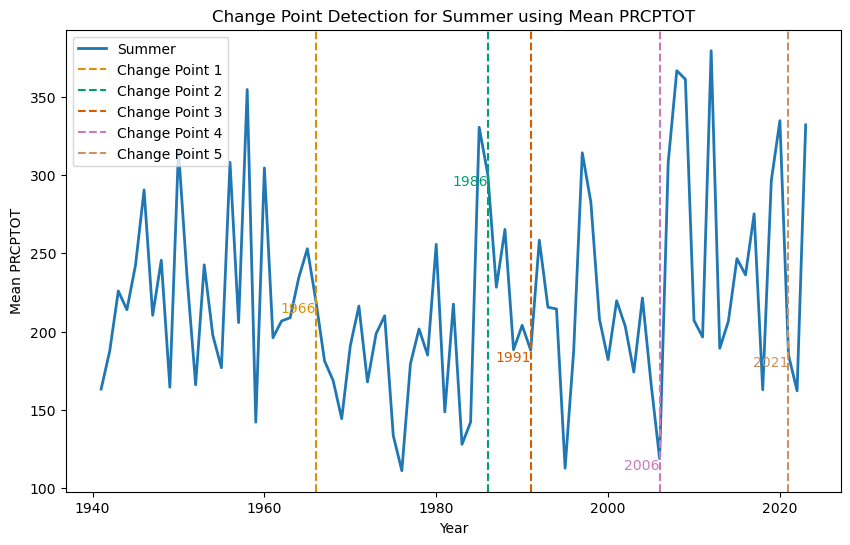

Autumn data points: [246.35714286 187.22857143 262.9875     395.74       196.1
 332.98       257.46       243.06       269.29       316.5
 290.17       234.29090909 253.84545455 397.025      191.4
 217.46428571 277.38125    241.84705882 287.18666667 369.2125
 293.69444444 257.         325.51578947 246.545      286.57222222
 275.07       349.55714286 349.00909091 191.54090909 327.22857143
 206.00909091 192.07391304 277.14090909 270.54761905 299.75
 337.01818182 311.79565217 210.14545455 293.70454545 358.44782609
 328.54285714 374.5826087  268.53478261 348.46190476 222.32272727
 223.7952381  303.94761905 244.12857143 251.74761905 282.39565217
 297.17826087 273.08181818 245.98636364 234.77391304 318.6
 299.31363636 271.97727273 343.79047619 307.7        433.26666667
 220.61363636 362.88636364 216.12380952 282.79       288.84761905
 380.27619048 168.27       328.05789474 403.71111111 333.9
 365.61111111 272.092      238.12083333 284.824      305.16
 215.688      318.72       279.50833333 3

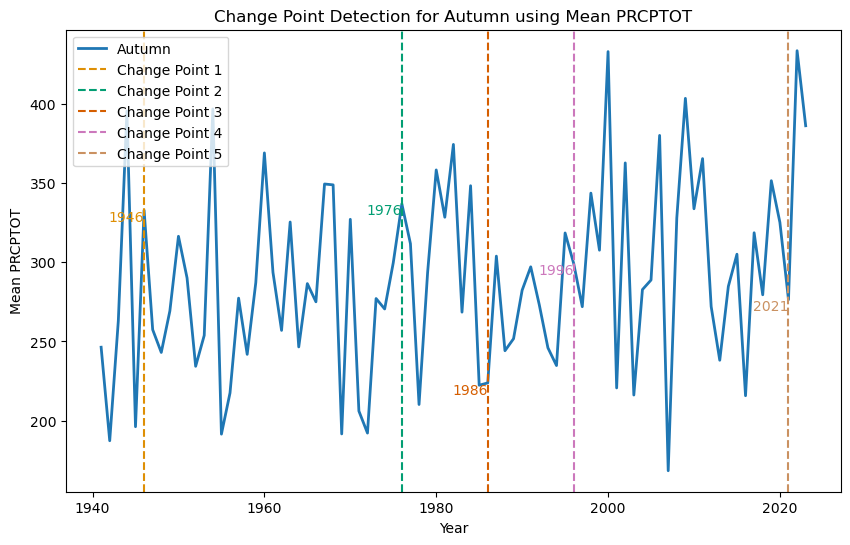

Winter data points: [221.9        317.67142857 193.8        267.31111111 313.29
 311.72       350.41111111 296.05       309.6        280.05
 275.52       174.24545455 243.27272727 287.55833333 221.91666667
 313.27857143 310.41176471 210.45882353 357.19411765 334.09375
 239.73888889 172.63333333 132.52631579 276.735      383.75
 279.87142857 211.08571429 331.86315789 308.87       188.42
 253.695      263.50454545 367.83913043 263.96363636 179.62272727
 329.80909091 293.02272727 321.45       354.56363636 250.64761905
 285.04285714 291.33636364 371.92272727 216.18       221.97
 289.375      334.17619048 231.52380952 410.32380952 297.195
 177.34545455 227.68       422.97894737 439.51904762 306.3
 203.84285714 287.98571429 309.49473684 348.385      258.88823529
 312.41904762 215.74210526 243.9        247.47368421 163.965
 339.96190476 321.95       234.91111111 232.34375    242.08333333
 243.45       294.35       511.304      301.216      549.98
 209.384      353.008      266.95652174 404.82

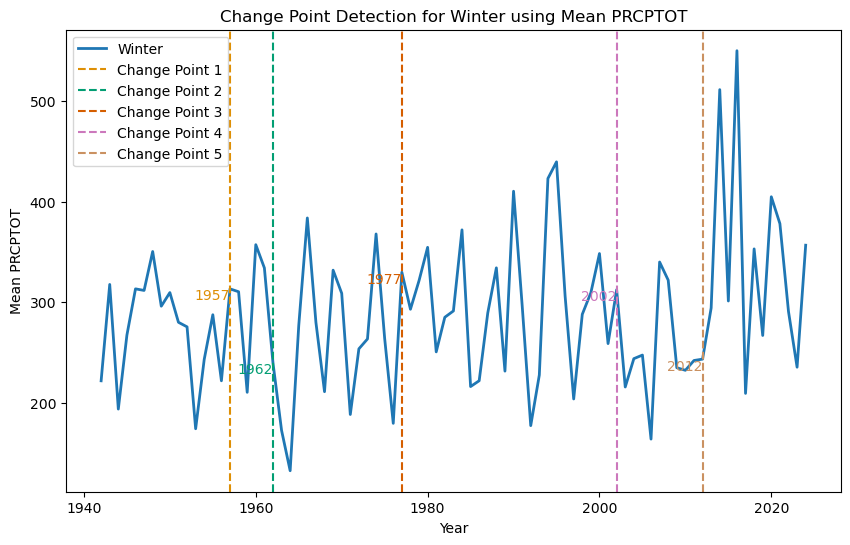

Spring data points: [205.0375     259.74285714 168.1        109.93       159.55
 144.33       350.2        190.37       169.67       144.22727273
 176.75       163.04       126.84545455 204.65833333 176.63076923
 136.27692308 179.88125    188.73529412 194.29411765 190.48823529
 170.65       197.825      254.74736842 242.21428571 230.205
 257.7        211.06190476 191.47272727 181.23636364 158.92272727
 137.22727273 249.58571429 164.41818182 153.25217391 116.65652174
 191.68181818 184.22173913 167.53913043 248.19545455 146.9826087
 300.02       195.57826087 254.03913043 123.82608696 233.97272727
 281.65454545 173.55454545 219.90869565 212.27727273 117.57391304
 218.67826087 239.45       260.95217391 277.42272727 179.75
 234.50909091 138.87619048 229.86818182 192.11904762 166.85238095
 179.81363636 243.07142857 220.25238095 169.80952381 218.1
 259.73333333 150.14285714 200.35882353 237.14210526 173.02777778
 170.38333333 155.3        211.816      221.348      266.064
 190.144      185.12

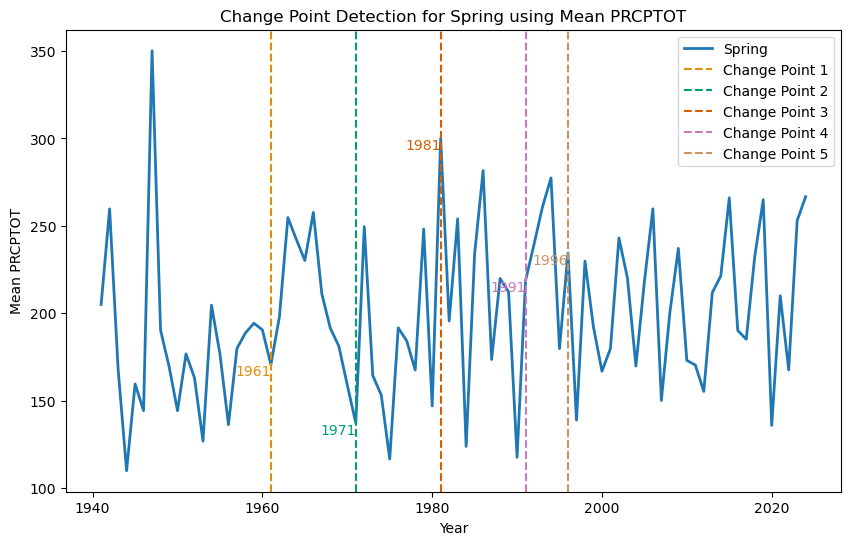

In [103]:
import ruptures as rpt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

seasons = ['Summer', 'Autumn', 'Winter', 'Spring']

for season in seasons:
    season_data = seasonal[seasonal['season'] == season]
    aggregated_data = season_data.groupby('year')['PRCPTOT'].mean()

    points = aggregated_data.values
    algo = rpt.Binseg(model="rank").fit(points)
    result = algo.predict(n_bkps=5) 

    print(f"{season} data points:", points)
    print(f"Change points for {season}:", result)

    plt.figure(figsize=(10,6))
    plt.plot(aggregated_data.index, points, label=f'{season}', linewidth=2)
    palette = sns.color_palette("colorblind")

    for i, cp in enumerate(result[:-1]):
        year = aggregated_data.index[cp]
        color = palette[i+1]
        plt.axvline(x=year, color=color, linestyle='--', label=f'Change Point {i+1}')
        y_pos = points[cp]
        plt.text(year, y_pos, f'{year}', color=color, verticalalignment='top', horizontalalignment='right')
        print(f"Change Point {i+1}: Year {year}, Position {cp}, Y-Position {y_pos}")

    plt.xlabel('Year')
    plt.ylabel('Mean PRCPTOT')
    plt.title(f'Change Point Detection for {season} using Mean PRCPTOT')
    plt.legend()
    plt.show()


# Change point analysis of TXx


Summer data points: [22.8        25.65       25.1        24.35       23.8        22.53333333
 27.26666667 27.76666667 26.73333333 27.18       23.6        24.11666667
 25.15       22.08333333 28.45714286 23.8375     26.         23.51666667
 24.78333333 23.71666667 22.88666667 22.45       24.3        22.54444444
 22.41666667 23.3        22.84210526 23.97368421 25.71666667 25.31428571
 24.66190476 24.78       26.13       23.455      27.18636364 28.42857143
 25.47727273 23.17619048 23.6        22.54       24.0952381  24.74090909
 28.80454545 25.69090909 23.02272727 24.28571429 23.87727273 23.81
 28.09       26.68181818 24.83684211 23.93157895 23.04545455 22.695
 28.41904762 25.11111111 24.48095238 23.275      25.54210526 25.30526316
 24.425      23.655      27.285      24.56315789 26.275      27.995
 23.81578947 23.56333333 25.43736842 23.125      22.65882353 24.21086957
 27.6004     25.4384     22.7996     26.0904     25.166      28.4536
 24.6773913  24.7004     28.022      28.7652     25

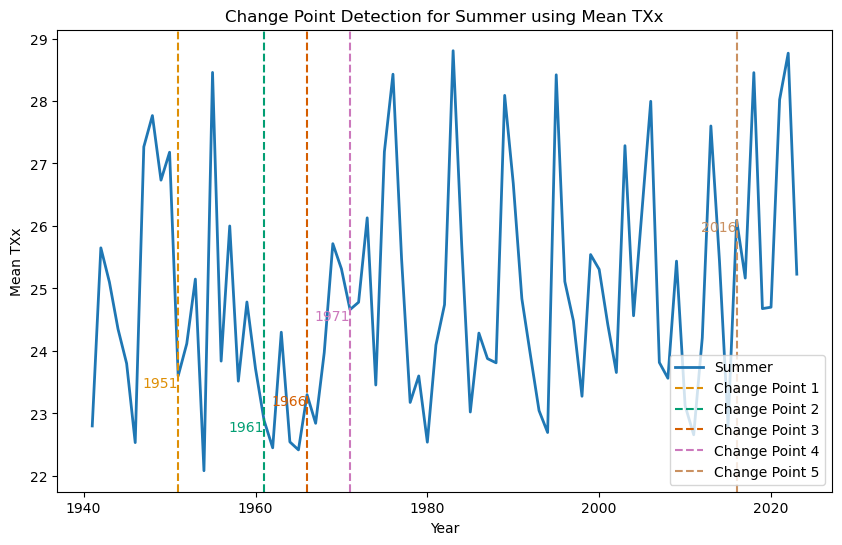

Autumn data points: [23.7        19.85       19.5        19.65       22.2        19.93333333
 22.1        19.5        22.46666667 18.6        20.31666667 18.56666667
 23.88333333 20.1        22.21428571 21.1625     19.23333333 20.86666667
 24.70833333 20.20833333 21.86428571 18.70666667 20.04375    20.96470588
 19.05       20.44705882 18.72777778 20.57       21.12631579 20.68
 22.27142857 22.40952381 23.24285714 17.725      21.11428571 20.38095238
 20.53181818 20.82       20.03157895 19.93636364 22.4952381  21.17727273
 21.24545455 21.37       22.425      20.605      19.6047619  20.7
 20.14       21.21818182 24.47894737 18.5952381  20.99047619 20.2
 20.705      22.6047619  20.85714286 22.7        22.71111111 21.245
 20.55714286 21.1        22.845      23.10526316 22.23       21.73
 21.44736842 18.75631579 20.18333333 21.53833333 21.16055556 20.5624
 22.4675     21.892      19.2768     21.9612     20.2768     21.10291667
 20.962      22.1984     24.7596     21.1436     26.5716    ]
Chan

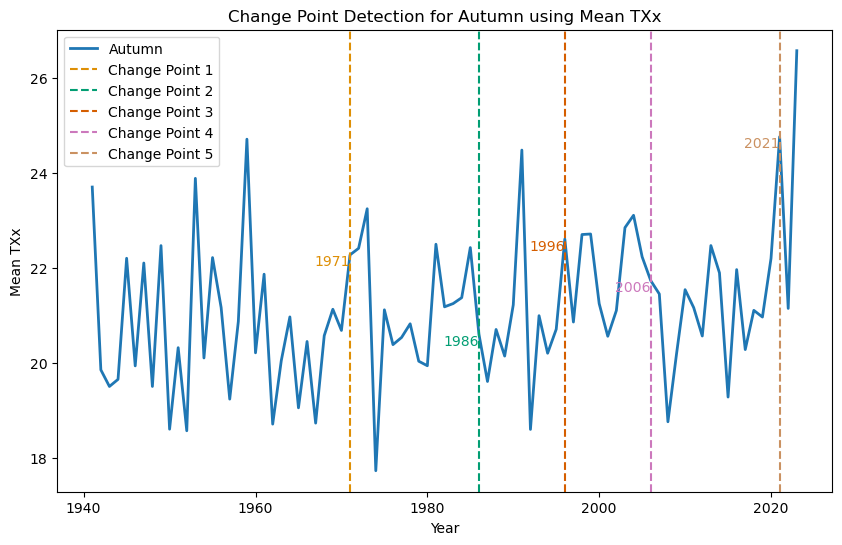

Winter data points: [12.8        13.25       12.95       14.         13.2        12.36666667
 13.16666667 16.33333333 13.62       12.01666667 12.78333333 13.95
 13.65       13.91428571 13.5375     13.97       13.68333333 13.23333333
 13.71666667 13.41538462 13.16       12.76       13.11176471 12.6875
 12.84117647 12.31111111 13.1        12.87368421 12.18823529 13.5
 13.90555556 13.3047619  12.63333333 13.52857143 12.82380952 11.32380952
 13.26190476 13.31578947 13.265      12.85714286 13.175      13.03333333
 13.2        13.03157895 14.52105263 13.85789474 13.47619048 13.46666667
 13.57368421 12.55882353 13.485      13.57894737 13.19473684 14.48095238
 14.04117647 13.105      14.795      14.23684211 13.51578947 12.84375
 13.8        13.72222222 13.925      13.28333333 12.99473684 13.68
 14.64210526 12.60277778 11.865625   13.605      13.56375    13.05875
 13.952      13.8228     14.4876     14.4716     13.4288     15.4173913
 13.4672     12.9632     14.2512     13.7868     14.062     ]

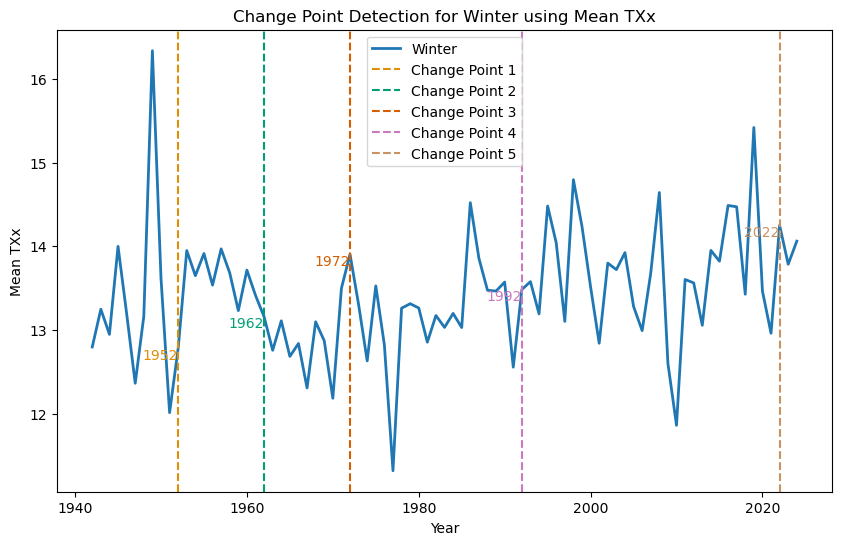

Spring data points: [18.9        19.9        19.8        23.85       22.8        19.86666667
 20.1        23.8        21.03333333 22.36       18.68333333 23.61666667
 22.63333333 20.11666667 19.32857143 19.975      19.94545455 20.625
 22.45       19.775      20.34666667 18.56470588 19.29375    21.
 20.54705882 21.67222222 19.11666667 19.78       17.62941176 19.96666667
 18.53809524 17.19473684 19.38571429 18.55714286 21.19090909 18.82380952
 20.18181818 22.97619048 18.575      21.14761905 19.3        21.05909091
 17.15454545 20.12272727 19.735      17.3047619  20.68571429 21.06818182
 23.97619048 23.72727273 21.67222222 22.545      19.69545455 18.91428571
 21.62857143 18.8047619  23.44285714 22.9        20.03809524 21.85
 22.27142857 18.78       22.515      20.06666667 18.46315789 20.66
 22.175      22.40875    21.99       23.13111111 20.44277778 23.94588235
 18.856      19.5892     19.0308     22.126      23.3144     23.65875
 21.03375    23.89125    20.9332     19.604      21.9448   

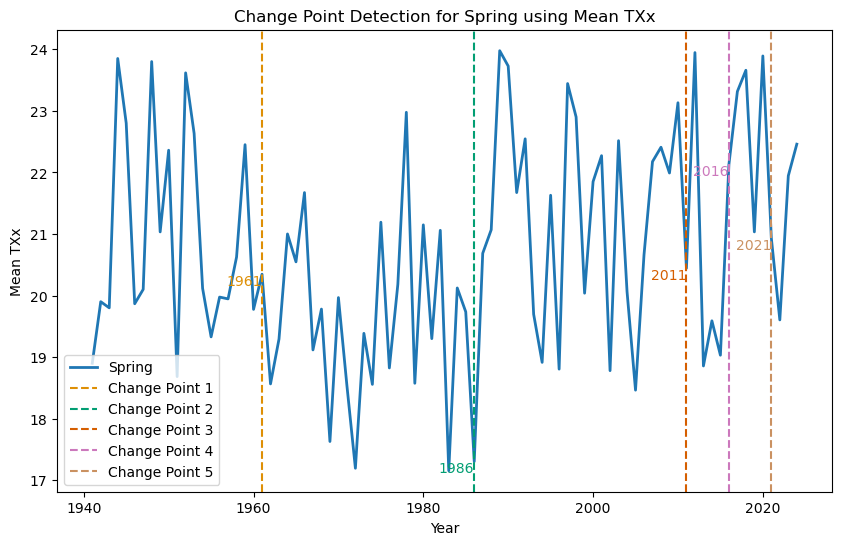

In [104]:
import ruptures as rpt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

seasons = ['Summer', 'Autumn', 'Winter', 'Spring']

for season in seasons:
    season_data = seasonal[seasonal['season'] == season]
    aggregated_data = season_data.groupby('year')['TXx'].mean()

    points = aggregated_data.values
    algo = rpt.Binseg(model="rank").fit(points)
    result = algo.predict(n_bkps=5) 

    print(f"{season} data points:", points)
    print(f"Change points for {season}:", result)

    plt.figure(figsize=(10,6))
    plt.plot(aggregated_data.index, points, label=f'{season}', linewidth=2)
    palette = sns.color_palette("colorblind")

    for i, cp in enumerate(result[:-1]):
        year = aggregated_data.index[cp]
        color = palette[i+1]
        plt.axvline(x=year, color=color, linestyle='--', label=f'Change Point {i+1}')
        y_pos = points[cp]
        plt.text(year, y_pos, f'{year}', color=color, verticalalignment='top', horizontalalignment='right')
        print(f"Change Point {i+1}: Year {year}, Position {cp}, Y-Position {y_pos}")

    plt.xlabel('Year')
    plt.ylabel('Mean TXx')
    plt.title(f'Change Point Detection for {season} using Mean TXx')
    plt.legend()
    plt.show()

# Calculating rate of change of temperature and precipitation for every 30 years

In [105]:
import pandas as pd
data.loc[:, 'year'] = pd.to_datetime(data['year'], format='%Y').dt.year

min_year = data['year'].min()
max_year = data['year'].max()

start_base = (min_year // 30) * 30  
if start_base < min_year:
    start_base = min_year

def determine_period(year):
    period_start = ((year - start_base) // 30) * 30 + start_base
    period_end = period_start + 29
    if period_end > max_year:
        period_end = max_year
    return f"{period_start}-{period_end}"

data.loc[:, 'Period'] = data['year'].apply(determine_period)

aggregated_data = data.groupby(['Period']).agg({
    'TXx': 'mean',
    'PRCPTOT': 'mean'
}).reset_index()

aggregated_data


,Period,TXx,PRCPTOT
0,1941-1970,24.195341,964.422454
1,1971-2000,25.091086,987.238346
2,2001-2023,25.696389,1057.979359


In [106]:
from scipy.stats import linregress
aggregated_data['Midpoint'] = aggregated_data['Period'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) // 2)

if 'Midpoint' not in aggregated_data.columns:
    raise KeyError("'Midpoint' column not found in the DataFrame!")

aggregated_data['TXx'] = pd.to_numeric(aggregated_data['TXx'], errors='coerce')
aggregated_data['PRCPTOT'] = pd.to_numeric(aggregated_data['PRCPTOT'], errors='coerce')
aggregated_data['Midpoint'] = pd.to_numeric(aggregated_data['Midpoint'], errors='coerce')

aggregated_data.dropna(subset=['TXx', 'PRCPTOT', 'Midpoint'], inplace=True)

temp_results = []
precipitation_results = []

for i in range(1, len(aggregated_data)):
    subset_df = aggregated_data.iloc[:i+1]
    
    slope, intercept, r_value, p_value, std_err = linregress(subset_df['Midpoint'], subset_df['TXx'])
    
    rate_of_change_per_decade = slope * 10
    
    if p_value < 0.05:
        temp_results.append(f"{rate_of_change_per_decade:.3f}*")
    else:
        temp_results.append(f"{rate_of_change_per_decade:.3f}")
    
    slope, intercept, r_value, p_value, std_err = linregress(subset_df['Midpoint'], subset_df['PRCPTOT'])
    
    rate_of_change_per_decade = slope * 10
    
    if p_value < 0.05:
        precipitation_results.append(f"{rate_of_change_per_decade:.3f}*")
    else:
        precipitation_results.append(f"{rate_of_change_per_decade:.3f}")

aggregated_data['Rate of temperature change (℃/10a)'] = [None] + temp_results
aggregated_data['Rate of precipitation change (mm/10a)'] = [None] + precipitation_results

final_table = aggregated_data[['Period', 'TXx', 'Rate of temperature change (℃/10a)', 'PRCPTOT', 'Rate of precipitation change (mm/10a)']]
print(final_table)


      Period        TXx Rate of temperature change (℃/10a)      PRCPTOT  \
0  1941-1970  24.195341                               None   964.422454   
1  1971-2000  25.091086                             0.299*   987.238346   
2  2001-2023  25.696389                              0.264  1057.979359   

  Rate of precipitation change (mm/10a)  
0                                  None  
1                                7.605*  
2                                16.251  


In [107]:
final_table

,Period,TXx,Rate of temperature change (℃/10a),PRCPTOT,Rate of precipitation change (mm/10a)
0,1941-1970,24.195341,None,964.422454,None
1,1971-2000,25.091086,0.299*,987.238346,7.605*
2,2001-2023,25.696389,0.264,1057.979359,16.251


# Correlation Coeffecient

In [108]:
final_table['Period_numeric'] = pd.to_numeric(final_table['Period'].str.split('-').str[0])
correlation_period_prcptot = final_table['PRCPTOT'].corr(final_table['Period_numeric'])
print("Correlation coefficient of PRCPTOT:", correlation_period_prcptot)

Correlation coefficient of PRCPTOT: 0.9589403309575141


In [109]:
correlation_period_tx = final_table['TXx'].corr(final_table['Period_numeric'])
print("Correlation coefficient of TXx:", correlation_period_tx)

Correlation coefficient of TXx: 0.9938179048207065


In [113]:
final_table['Period_numeric']

0    1941
1    1971
2    2001
Name: Period_numeric, dtype: int64

# Comparison Rates of major countries in Europe for studying climate indicies:

In [110]:
Germany = pd.read_csv('final_table_Germany.csv')

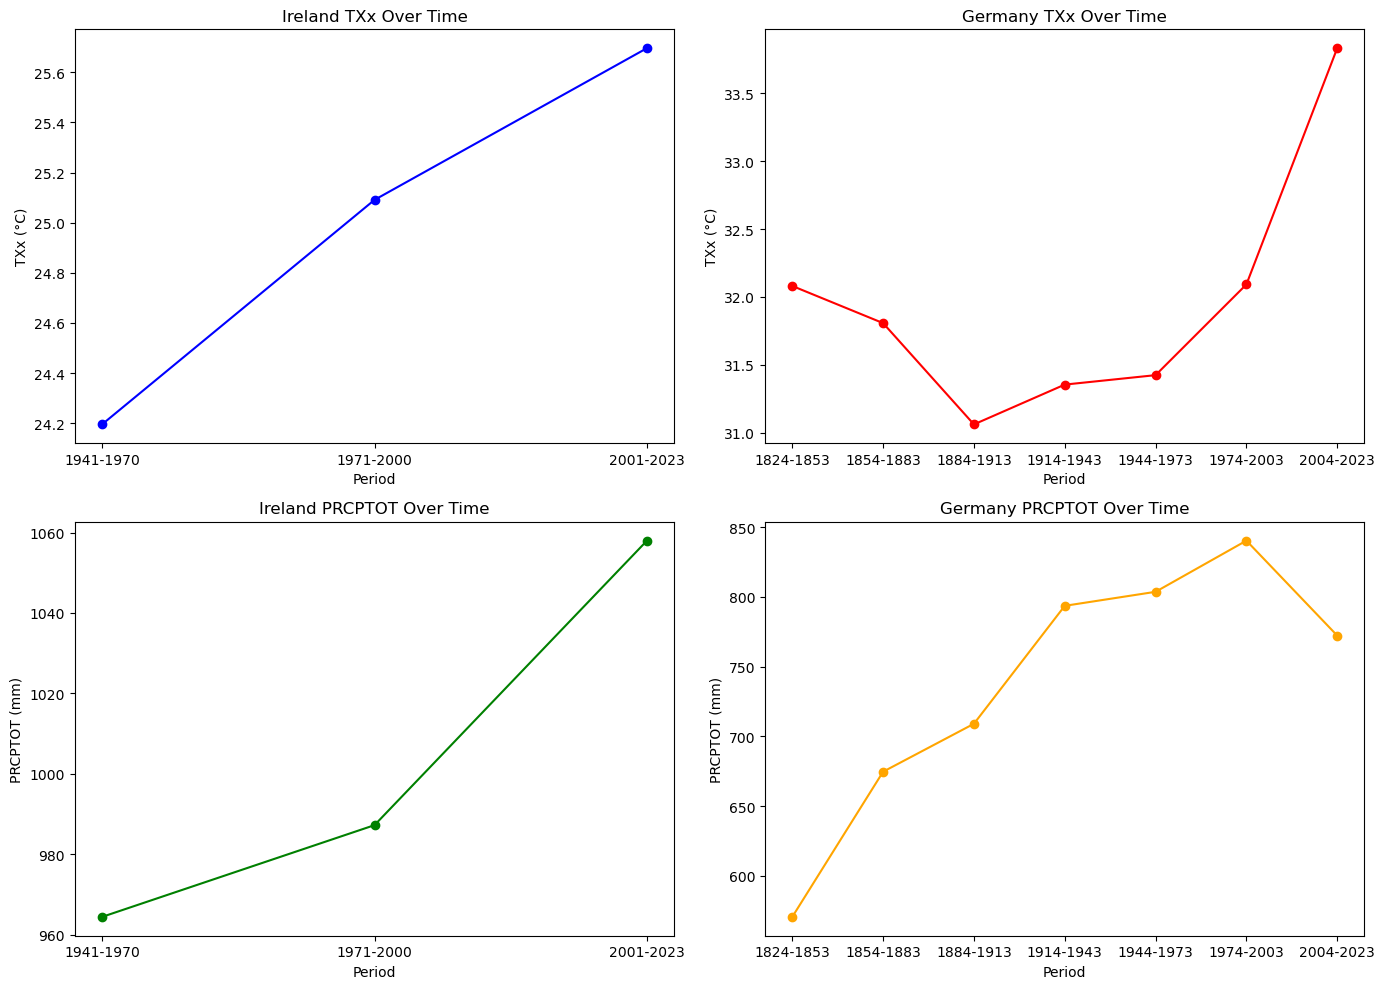

In [111]:
# Plotting the data
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Ireland TXx
axes[0, 0].plot(final_table["Period"], final_table["TXx"], marker='o', color='blue')
axes[0, 0].set_title("Ireland TXx Over Time")
axes[0, 0].set_xlabel("Period")
axes[0, 0].set_ylabel("TXx (°C)")

# Germany TXx
axes[0, 1].plot(Germany["Period"], Germany["TXx"], marker='o', color='red')
axes[0, 1].set_title("Germany TXx Over Time")
axes[0, 1].set_xlabel("Period")
axes[0, 1].set_ylabel("TXx (°C)")

# Ireland PRCPTOT
axes[1, 0].plot(final_table["Period"], final_table["PRCPTOT"], marker='o', color='green')
axes[1, 0].set_title("Ireland PRCPTOT Over Time")
axes[1, 0].set_xlabel("Period")
axes[1, 0].set_ylabel("PRCPTOT (mm)")

# Germany PRCPTOT
axes[1, 1].plot(Germany["Period"], Germany["PRCPTOT"], marker='o', color='orange')
axes[1, 1].set_title("Germany PRCPTOT Over Time")
axes[1, 1].set_xlabel("Period")
axes[1, 1].set_ylabel("PRCPTOT (mm)")

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


# Comparison of Correlation Coeffecient of major countries in Europe for studying climate indicies:

In [112]:
import pandas as pd

# Data for correlation coefficients
correlation_data = {
    "Country": ["Ireland", "Germany"],
    "TXx ": [0.9938179048207065, 0.5217635158873617],
    "PRCPTOT": [0.9589403309575141, 0.855031258832045]
}

# Creating DataFrame
correlation_df = pd.DataFrame(correlation_data)

correlation_df

,Country,TXx,PRCPTOT
0,Ireland,0.993818,0.958940
1,Germany,0.521764,0.855031
